# This model was built using Support Vector Machine Classifier (Linear Kernel using GridSearchCV) (Binary Classification) using the Sci-Kit Learn package from Python which is based on LibSVM implementation.

### However a few other classification models like KNN Classifier, Gaussian Naive-Bayes Classifier, Logistic Regression using GridSearchCV methods were cross-validated and experimented. No bagging or boosting techniques were tested because dataset is very small and could lead to overfit. We will be going through the different pre-processing techniques and showing visualizations to arrange our dataframe.





----------------

-----------------------------

### Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

In [2]:
train=pd.read_csv('mmtrain.csv') #importing the train dataset
train.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [3]:
train.shape

(552, 17)

In [4]:
y=train['P']

In [5]:
train.drop(['id','P'],axis=1,inplace=True)

### Data Pre-processing

In [6]:
for i in train.columns:
    print(i,' ',train[i].nunique())

A   2
B   306
C   193
D   3
E   3
F   14
G   9
H   123
I   2
J   2
K   21
L   2
M   3
N   145
O   196


In [7]:
train.isnull().sum()

A     8
B     9
C     0
D     5
E     5
F     7
G     7
H     0
I     0
J     0
K     0
L     0
M     0
N    11
O     0
dtype: int64

In [8]:
train['A'].value_counts()

b    374
a    170
Name: A, dtype: int64

In [9]:
test1=pd.read_csv('mmtest.csv') # importing the test dataset
test1.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0


In [10]:
test1.shape

(138, 16)

In [11]:
test1.isnull().sum()

id    0
A     4
B     3
C     0
D     1
E     1
F     2
G     2
H     0
I     0
J     0
K     0
L     0
M     0
N     2
O     0
dtype: int64

In [12]:
test1.columns

Index(['id', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'],
      dtype='object')

In [13]:
test=test1[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O']]

In [14]:
for i in train.columns:
    if train[i].dtype=="object":
        print(i,' ',train[i].value_counts())

A   b    374
a    170
Name: A, dtype: int64
D   u    416
y    129
l      2
Name: D, dtype: int64
E   g     416
p     129
gg      2
Name: E, dtype: int64
F   c     115
q      66
w      50
i      47
ff     43
aa     42
k      40
m      31
x      31
cc     29
d      24
e      18
j       8
r       1
Name: F, dtype: int64
G   v     319
h     113
bb     47
ff     46
z       7
j       6
dd      3
n       2
o       2
Name: G, dtype: int64
I   t    286
f    266
Name: I, dtype: int64
J   f    319
t    233
Name: J, dtype: int64
L   f    298
t    254
Name: L, dtype: int64
M   g    497
s     48
p      7
Name: M, dtype: int64


In [15]:
test.shape

(138, 15)

In [16]:
train.shape

(552, 15)

In [17]:
all_X=train.append(test) # We append to fill-up null values at once and also do the Label Encoding at once

In [18]:
# We'll impute missing values using the median for numeric columns and the most common value for string columns.
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [19]:
all_X_imputed = DataFrameImputer().fit_transform(all_X)

In [20]:
all_X_imputed.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'],
      dtype='object')

In [21]:
all_X_imputed.isnull().any()

A    False
B    False
C    False
D    False
E    False
F    False
G    False
H    False
I    False
J    False
K    False
L    False
M    False
N    False
O    False
dtype: bool

In [22]:
#categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in all_X_imputed.columns:
    if all_X_imputed[feature].dtype == 'object':
        all_X_imputed[feature] = le.fit_transform(all_X_imputed[feature])

In [23]:
x_train=all_X_imputed[0:train.shape[0]]

In [24]:
x_train.shape

(552, 15)

In [25]:
x_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1,18.42,10.415,2,2,0,7,0.125,1,0,0,0,0,120.0,375
1,0,21.75,11.750,1,0,1,7,0.250,0,0,0,1,0,180.0,0
2,1,30.17,1.085,2,2,1,7,0.040,0,0,0,0,0,170.0,179
3,1,22.67,2.540,2,2,1,3,2.585,1,0,0,0,0,0.0,0
4,0,36.00,1.000,1,0,1,7,2.000,1,1,11,0,0,0.0,456


In [26]:
x_test=all_X_imputed[train.shape[0]::]

In [27]:
x_test.shape

(138, 15)

In [28]:
x_test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1,29.17,3.500,1,0,12,7,3.500,1,1,3,1,0,329.0,0
1,1,28.33,5.000,1,0,12,7,11.000,1,0,0,1,0,70.0,0
2,1,29.25,14.790,1,0,0,7,5.040,1,1,5,1,0,168.0,0
3,0,44.17,6.665,1,0,10,7,7.375,1,1,3,1,0,0.0,0
4,1,18.08,5.500,1,0,8,7,0.500,1,0,0,0,0,80.0,0


## Lets check if we have some outliers in our dataset

### We'll be using boxplot method over here. There are other methods like z-score or the modified z-score method, interquartile range method,etc. We will use the mean-std.deviation method to fix the outliers

We can check outliers only for numerical values (Ignore label encoded columns)

### Outliers Test for Train dataset

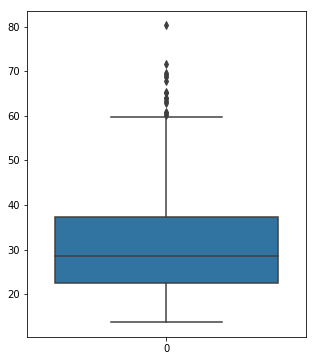

In [29]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_train['B'])

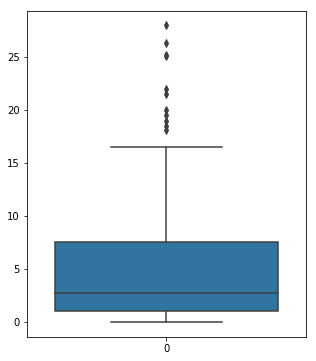

In [30]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_train['C'])

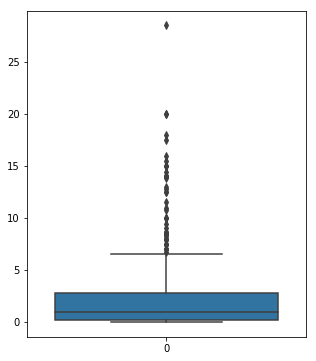

In [31]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_train['H'])

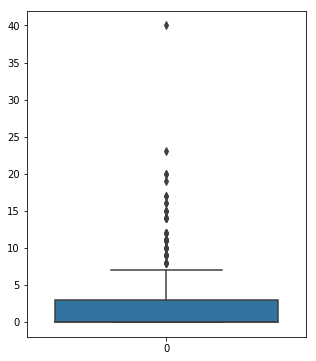

In [32]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_train['K'])

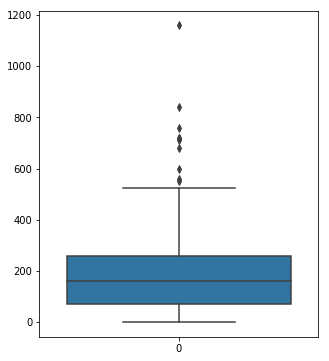

In [33]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_train['N'])

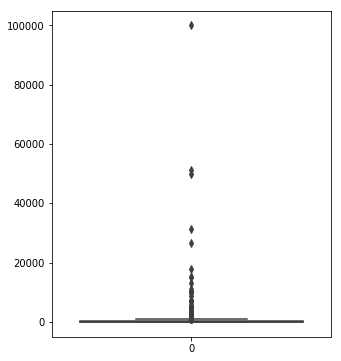

In [34]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_train['O'])

In [35]:
x_train=x_train.mask(x_train.sub(x_train.mean()).div(x_train.std()).abs().gt(2)) #filling up the outliers with null values

In [36]:
x_train.shape

(552, 15)

In [37]:
x_train.isnull().sum()

A     0
B    29
C    21
D     2
E     0
F     0
G    47
H    26
I     0
J     0
K    42
L     0
M    48
N    19
O     9
dtype: int64

In [38]:
x_train.fillna(x_train.mean(),inplace=True) #Filling up the null values with mean values

In [39]:
x_train.isnull().any()

A    False
B    False
C    False
D    False
E    False
F    False
G    False
H    False
I    False
J    False
K    False
L    False
M    False
N    False
O    False
dtype: bool

### Outliers for test dataset

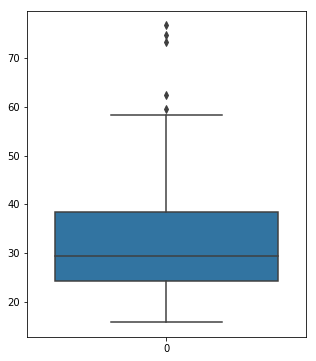

In [40]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_test['B'])

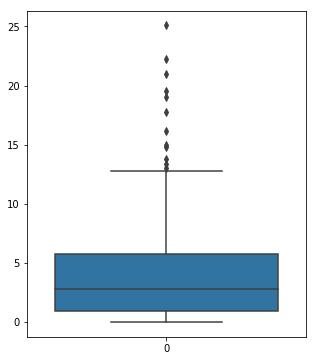

In [41]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_test['C'])

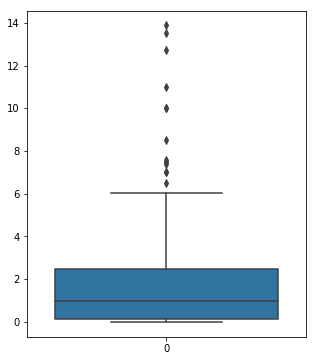

In [42]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_test['H'])

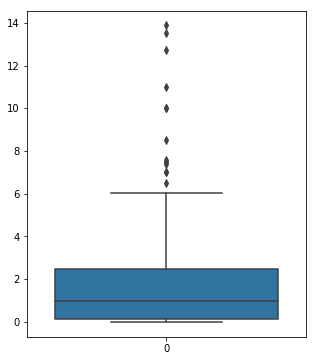

In [43]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_test['H'])

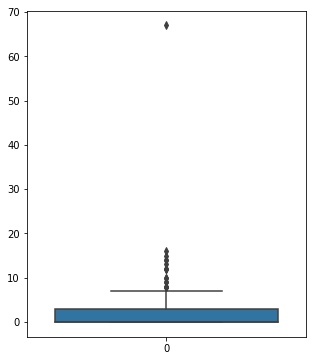

In [44]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_test['K'])

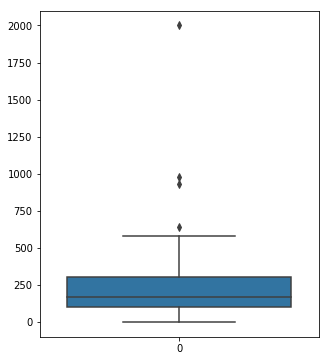

In [45]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_test['N'])

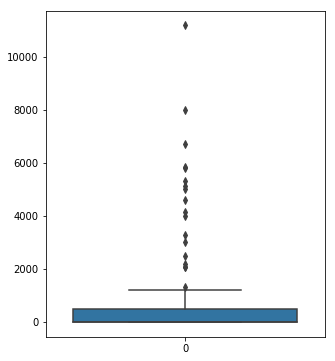

In [46]:
plt.figure(figsize=(5,6))
sns.boxplot(data=x_test['O'])

In [47]:
x_test=x_test.mask(x_test.sub(x_test.mean()).div(x_test.std()).abs().gt(2)) #filling up the outliers with null values

In [48]:
x_test.shape

(138, 15)

In [49]:
x_test.isnull().sum()

A    0
B    9
C    8
D    0
E    0
F    0
G    0
H    7
I    0
J    0
K    1
L    0
M    9
N    3
O    9
dtype: int64

In [50]:
x_test.fillna(x_test.mean(),inplace=True) #Filling up the null values with mean values

In [51]:
x_test.isnull().any()

A    False
B    False
C    False
D    False
E    False
F    False
G    False
H    False
I    False
J    False
K    False
L    False
M    False
N    False
O    False
dtype: bool

### Lets see if there's any highly correlated columns

In [52]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [53]:
print(to_drop)

[]


No highly correlated columns

------------------------------------


### Lets find out if our dataset is imbalanced or not

In [54]:
cnt_srs = y.value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Checking Imbalancing of Dataset'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Imbalancing Dataset")

### Fair enough, we don't have to apply any sampling technqiue

-----------------------------

## Lets scale the features

In [55]:
from sklearn import preprocessing

In [56]:
x_train=preprocessing.StandardScaler().fit_transform(x_train)
x_test=preprocessing.StandardScaler().fit_transform(x_test)

---------------------------------------------

### No feature engineering was possible, because all the variables are anonymised. Also we didn't implement any dimensional reduction techniques, like PCA because the dimension is already very reasonable.

### So lets get into the cross-validation, after which we will be building our predictive model

In [57]:
from sklearn.cross_validation import train_test_split

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

# Support Vector Machines

In [60]:
from sklearn.svm import SVC

In [61]:
algorithm = SVC()

### We start experimenting with the different kernels and using GridSearchCV method

## "C" stands for misclassification rate and "Gamma" is how much influence a single training example has

# Polynomial Kernel

In [62]:
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['poly']} 

In [63]:
#from sklearn.model_selection import GridSearchCV

In [64]:
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [65]:
#grid.fit(X_train,y_train)

In [66]:
#grid.best_params_

In [67]:
#grid.best_estimator_

In [68]:
#grid_predictions = grid.predict(X_test)

In [69]:
#print(confusion_matrix(y_test,grid_predictions))

### True +ve : 40 , True -ve: 83

In [71]:
#print(classification_report(y_test,grid_predictions))

## Radial Basis Function (Gaussian Kernel) 


In [72]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [75]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5447154471544715, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5447154471544715, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5447154471544715, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8373983739837398, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8780487804878049, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9024390243902439, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8699186991869918, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9024390243902439, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.8048780487804879, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.8455284552845529, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.8130081300813008, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.5447154471544715, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.5447154471544715, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf .......

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [76]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [77]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
grid_predictions = grid.predict(X_test)

In [79]:
print(confusion_matrix(y_test,grid_predictions))

[[70  9]
 [28 76]]


### True +ve : 70 , True -ve: 76

In [80]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.71      0.89      0.79        79
          1       0.89      0.73      0.80       104

avg / total       0.82      0.80      0.80       183



# Linear Kernel

In [81]:
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 

In [82]:
#from sklearn.model_selection import GridSearchCV

In [83]:
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [84]:
#grid.fit(X_train,y_train)

In [85]:
#grid.best_params_

In [86]:
#grid.best_estimator_

In [87]:
#grid_predictions = grid.predict(X_test)

In [88]:
#print(confusion_matrix(y_test,grid_predictions))

### True +ve: 68 True -ve: 78

In [89]:
#print(classification_report(y_test,grid_predictions))

### Since Linear Kernel has outperformed RBF kernel, we infer that our data is linearly separable and hence won't be experimenting with Polynomial Kernel

## Lets look at the hyperplane plots using the first 2 features of the dataset for all 3 kernels

### Linear Kernel

In [92]:
#X_train_hash=X_train.loc[:,['B','C']] # We take 2 features

In [93]:
#svc = SVC(kernel='linear', C=1,gamma='auto').fit(X_train_hash, y_train)

In [95]:
# get the separating hyperplane
#w = svc.coef_[0]
#a = -w[0] / w[1]
#xx = np.linspace(-5, 5)
#yy = a * xx - (svc.intercept_[0]) / w[1]

# create a mesh to plot in
#x_min, x_max = X_train_hash.values[:, 0].min() - 1, X_train_hash.values[:, 0].max() + 1
#y_min, y_max = X_train_hash.values[:, 1].min() - 1, X_train_hash.values[:, 1].max() + 1
#xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     #np.arange(y_min, y_max, .2))
#Z = svc.predict(np.c_[xx2.ravel(), yy2.ravel()])

#Z = Z.reshape(xx2.shape)
#plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
#plt.scatter(X_train_hash.values[:, 0], X_train_hash.values[:, 1], c=y_train.values.ravel(), cmap=plt.cm.coolwarm, s=25)
#plt.plot(xx,yy)

#plt.axis([x_min, x_max,y_min, y_max])
#plt.xlabel('Column Label "B"')
#plt.ylabel('Column Label "C"')
#plt.title('SVC with linear kernel')
#plt.show()

### RBF Kernel

In [96]:
#X_train_hash=X_train.loc[:,['B','C']] # We take 2 features

In [97]:
#svc = SVC(kernel='rbf', C=1,gamma='auto').fit(X_train_hash, y_train)

In [98]:
# create a mesh to plot in
#x_min, x_max = X_train_hash.values[:, 0].min() - 1, X_train_hash.values[:, 0].max() + 1
#y_min, y_max = X_train_hash.values[:, 1].min() - 1, X_train_hash.values[:, 1].max() + 1
#h = (x_max / x_min)/100
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 #np.arange(y_min, y_max, h))

#plt.subplot(1, 1, 1)
#Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

#plt.scatter(X_train_hash.values[:, 0], X_train_hash.values[:, 1], c=y_train.values.ravel(), cmap=plt.cm.Paired)
#plt.xlabel('Column Label "B"')
#plt.ylabel('Column Label "A"')
#plt.xlim(xx.min(), xx.max())
#plt.title('SVC with RBF kernel')
#plt.show()

### Polynomial Kernel

In [99]:
#X_train_hash=X_train.loc[:,['B','C']] # We take 2 features

In [100]:
#svc = SVC(kernel='poly', C=1,gamma='auto').fit(X_train_hash, y_train)

In [101]:
# create a mesh to plot in
#x_min, x_max = X_train_hash.values[:, 0].min() - 1, X_train_hash.values[:, 0].max() + 1
#y_min, y_max = X_train_hash.values[:, 1].min() - 1, X_train_hash.values[:, 1].max() + 1
#h = (x_max / x_min)/100
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 #np.arange(y_min, y_max, h))

#plt.subplot(1, 1, 1)
#Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

#plt.scatter(X_train_hash.values[:, 0], X_train_hash.values[:, 1], c=y_train.values.ravel(), cmap=plt.cm.Paired)
#plt.xlabel('Column Label "B"')
#plt.ylabel('Column Label "A"')
#plt.xlim(xx.min(), xx.max())
#plt.title('SVC with RBF kernel')
#plt.show()

-----------------------------

# Naive Bayes Classifier

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
gnb=GaussianNB()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.33, random_state=42)

In [105]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [106]:
preds=gnb.predict(X_test)

In [107]:
print(classification_report(preds,y_test))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80        79
          1       0.85      0.85      0.85       104

avg / total       0.83      0.83      0.83       183



In [108]:
print(confusion_matrix(preds,y_test))

[[63 16]
 [16 88]]


### True +ve: 63 True -ve: 88

-----------------------------------

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(cv=None,estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
            dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [112]:
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
clf.best_params_

{'C': 0.1}

In [114]:
clf.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
preds2=clf.predict(X_test)

In [116]:
print(classification_report(preds2,y_test))

             precision    recall  f1-score   support

          0       0.89      0.73      0.80        96
          1       0.75      0.90      0.82        87

avg / total       0.82      0.81      0.81       183



In [117]:
print(confusion_matrix(preds2,y_test))

[[70 26]
 [ 9 78]]


### True +ve: 70 True -ve: 78

----------------------------------------

# KNN Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn=KNeighborsClassifier(n_neighbors=5)

In [120]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
preds3=knn.predict(X_test)

In [122]:
print(classification_report(preds3,y_test))

             precision    recall  f1-score   support

          0       0.81      0.79      0.80        81
          1       0.84      0.85      0.84       102

avg / total       0.82      0.83      0.82       183



In [123]:
print(confusion_matrix(preds3,y_test))

[[64 17]
 [15 87]]


### True +ve: 64 True -ve: 87

------------------------------------------

### So we build our final prediction model using, SVM.

### Reason: Although we saw that Naive Bayes has given more accuracy, it has very weak prediction power  for "0". Where as SVM has higher prediction accuracy for "0". And combining the both prediction accuracy, SVM will obviously do a better job on unseen data for sure!



# Support Vector Machine Classifier (Linear Kernel) using GridSearchCV. 
### We make our predictions on the test dataset and generate the submission file successfully

In [124]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 

In [125]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [126]:
grid.fit(x_train,y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8594594594594595, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8641304347826086, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8415300546448088, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.8594594594594595, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.8641304347826086, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.8415300546448088, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear .......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=linear, score=0.8415300546448088, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.8594594594594595, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.8641304347826086, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.8415300546448088, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.8594594594594595, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.8641304347826086, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.8415300546448088, total=   0.0s
[CV] C=1, gamma=0.001, kernel=line

[CV]  C=1000, gamma=0.0001, kernel=linear, score=0.8594594594594595, total= 1.9min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV]  C=1000, gamma=0.0001, kernel=linear, score=0.8641304347826086, total= 1.3min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV]  C=1000, gamma=0.0001, kernel=linear, score=0.8415300546448088, total=  23.9s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 17.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [127]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [128]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [129]:
grid_predictions = grid.predict(x_test)

In [130]:
submissions=pd.DataFrame(columns=['id', 'P'])
submissions['id']=test1['id']
submissions['P']=grid_predictions
submissions.to_csv('mmtsub.csv', index=False)

# KNN

In [148]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=2,
 weights='uniform')

In [149]:
knn.fit(x_train,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [150]:
knn_preds=knn.predict(x_test)

In [151]:
submissions=pd.DataFrame(columns=['id', 'P'])
submissions['id']=test1['id']
submissions['P']=knn_preds
submissions.to_csv('mmtsub2.csv', index=False)

# Naive Bayes

In [142]:
#gnb.fit(x_train,y)

GaussianNB(priors=None)

In [143]:
#gnb_preds=gnb.predict(x_test)

In [144]:
#submissions=pd.DataFrame(columns=['id', 'P'])
#submissions['id']=test1['id']
#submissions['P']=gnb_preds
#submissions.to_csv('mmtsub3.csv', index=False)

# So its KNN giving the maximum accuracy